<a href="https://colab.research.google.com/github/gouthamans14/ResponseModel/blob/main/MarketingAnalytics1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [4]:
! pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 82.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0565dfb413831af366eba5ae2b7236a4d61ea9dd3304c2795b316a571a6d569b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [5]:
#Packages related to general operating system & warnings
import os
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
#from sklearn.preprocessing import Imputer, PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder

#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe


#Modules related to pipe line creation for faster processing
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
#from sklearn.features.transformers import DataFrameSelector

#Modules related to saving python objects permanantly
import joblib

#Dumping model into current directory: joblib.dump(model_xg,"my_model.pkl")
#Loading model: my_model_loaded=joblib.load("my_model.pkl")

#Modules related key techniques of supervised learning
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor# export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor
# import keras

<Figure size 600x300 with 0 Axes>

In [165]:
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import  XGBClassifier

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)


# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)


# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()


# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)


RFE_Classifier = RandomForestClassifier(criterion='entropy', random_state=0)


XGB_Classifier = XGBClassifier(n_jobs=-1, random_state=0)


# Importing Data

In [6]:
data = pd.read_csv('/content/bank-additional.csv', sep=";")

# Data Audit

In [7]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [8]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

Note:

Missing Information:
* Categorical Variable - Imputed as Unknown
* Numerical Variable - Imputed as 999

In [10]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### Generation Profile Report

In [12]:
#report=pandas_profiling.ProfileReport(data)

In [13]:
#report.to_file("report.html")

## Univarate Analysis

age


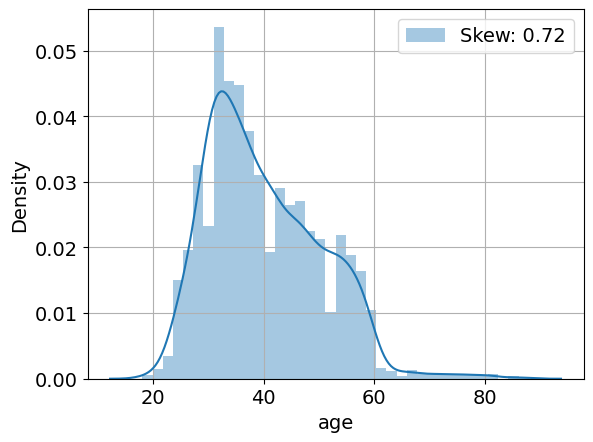

duration


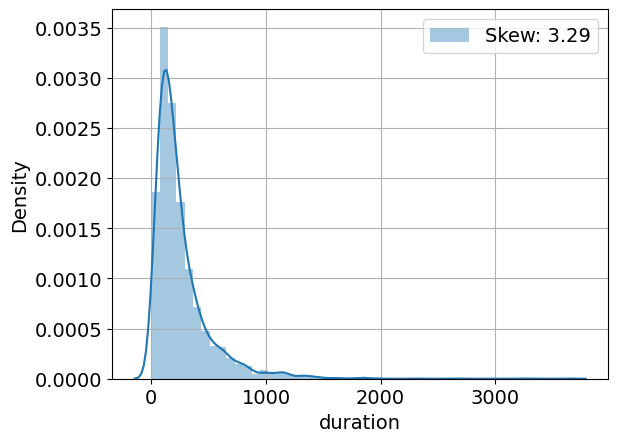

campaign


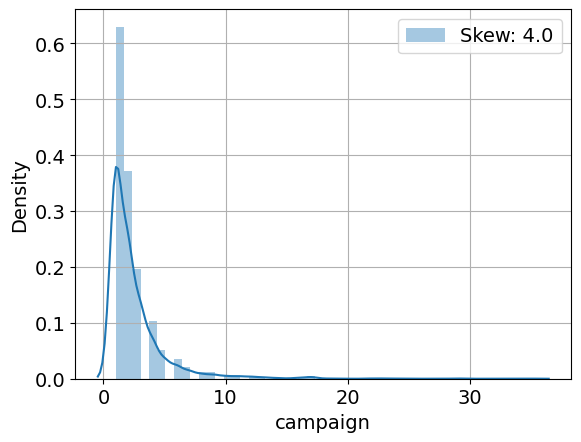

pdays


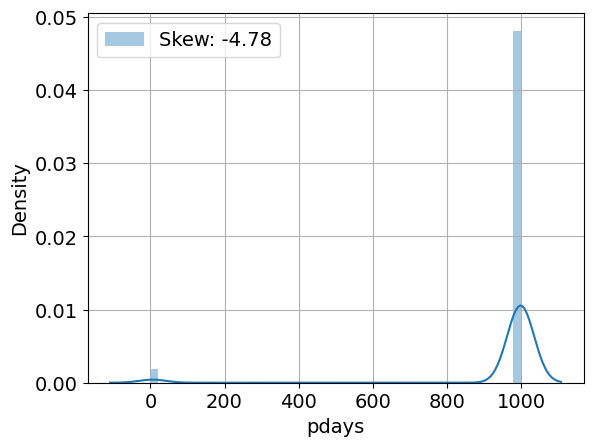

previous


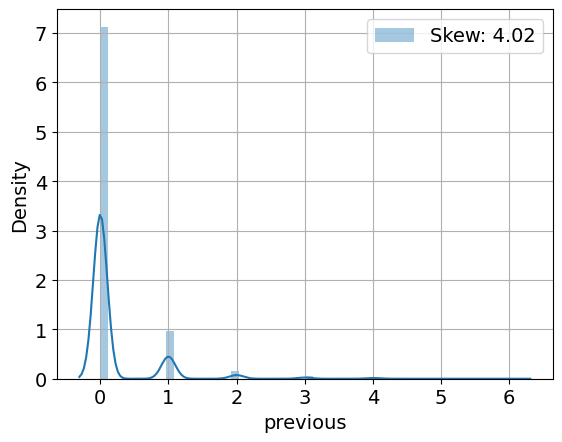

emp.var.rate


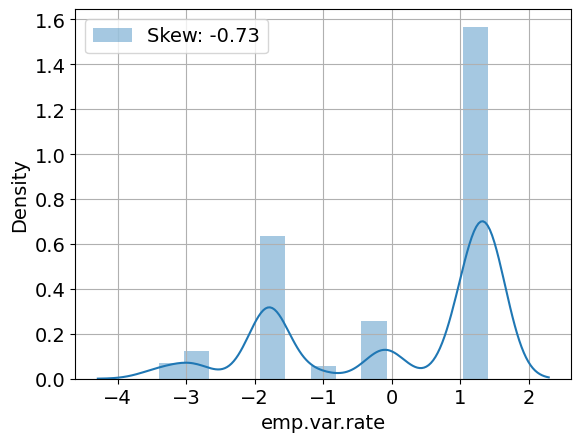

cons.price.idx


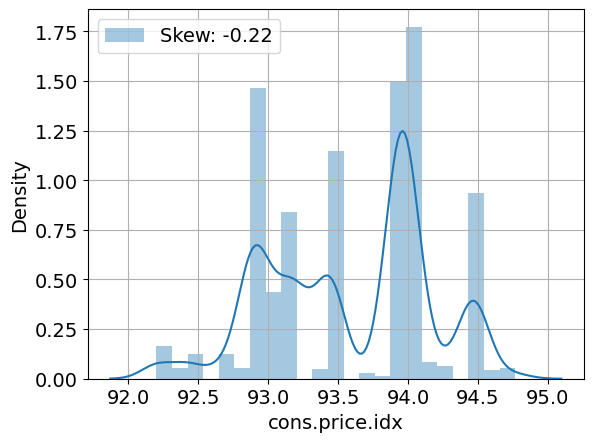

cons.conf.idx


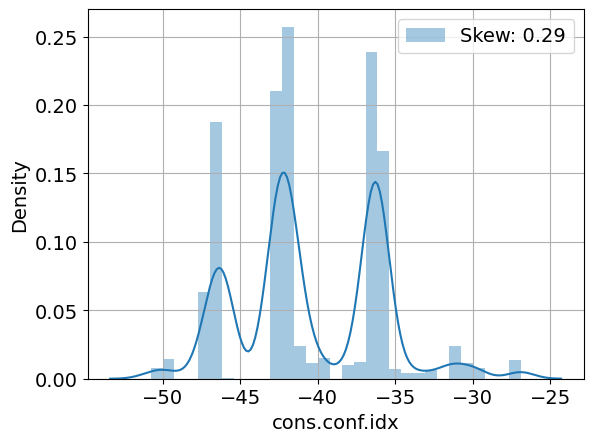

euribor3m


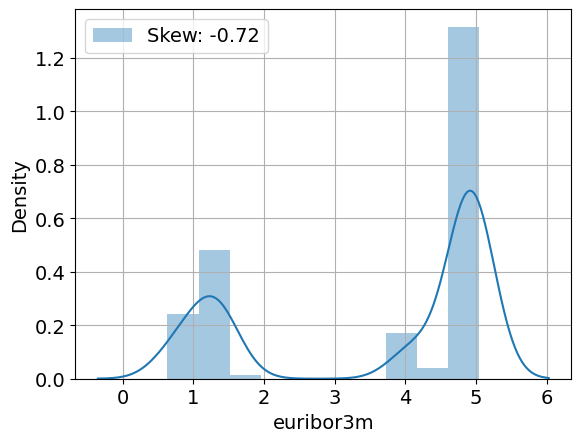

nr.employed


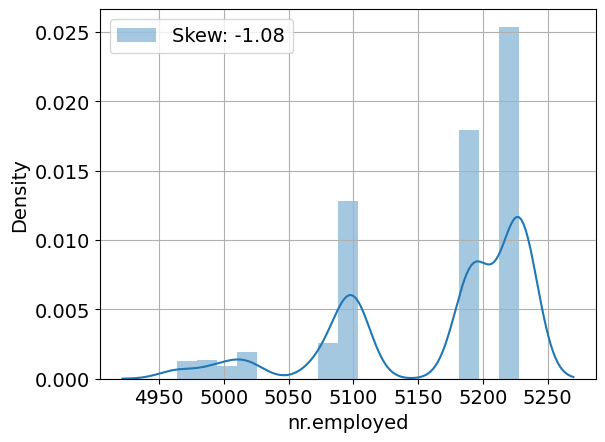

In [14]:
for i in data.describe().columns:
    print(i)
    sns.distplot(data[i], label="Skew: " + str(np.round((data[i].skew()),2)))
    plt.legend()
    plt.show()

### Dropping some variables after analyzing

In [15]:
data["previous"].value_counts()

0    3523
1     475
2      78
3      25
4      14
5       2
6       2
Name: previous, dtype: int64

In [16]:
(data["previous"].value_counts()/data.shape[0])

0    0.855305
1    0.115319
2    0.018937
3    0.006069
4    0.003399
5    0.000486
6    0.000486
Name: previous, dtype: float64

In [17]:
(data["default"].value_counts()/data.shape[0])*100

no         80.480699
unknown    19.495023
yes         0.024278
Name: default, dtype: float64

observation:
* Yes is 1 data litteraly
* Low variance so dropping default

In [18]:
data["pdays"].value_counts() / data.pdays.shape[0]

999    0.961156
3      0.012624
6      0.010197
4      0.003399
7      0.002428
10     0.001942
12     0.001214
5      0.000971
2      0.000971
1      0.000728
9      0.000728
16     0.000486
13     0.000486
18     0.000486
0      0.000486
15     0.000486
19     0.000243
17     0.000243
11     0.000243
21     0.000243
14     0.000243
Name: pdays, dtype: float64

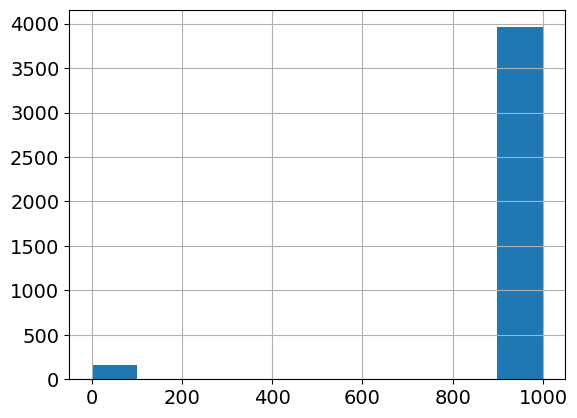

In [19]:
data.pdays.hist()
plt.show()

In [20]:
data.pdays

0       999
1       999
2       999
3       999
4       999
       ... 
4114    999
4115    999
4116    999
4117    999
4118    999
Name: pdays, Length: 4119, dtype: int64

#### Observation
* Note 999 is missing value this shows that we have 96% data missing

In [21]:
data.euribor3m

0       1.313
1       4.855
2       4.962
3       4.959
4       4.191
        ...  
4114    4.958
4115    4.959
4116    1.354
4117    4.966
4118    4.120
Name: euribor3m, Length: 4119, dtype: float64

In [22]:
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.041299,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936
duration,0.041299,1.000000,-0.085348,-0.046998,0.025724,-0.028848,0.016672,-0.034745,-0.032329,-0.044218
campaign,-0.014169,-0.085348,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037
pdays,-0.043425,-0.046998,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983
previous,0.050931,0.025724,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853
emp.var.rate,-0.019192,-0.028848,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173
cons.price.idx,-0.000482,0.016672,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560
cons.conf.idx,0.098135,-0.034745,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054
euribor3m,-0.015033,-0.032329,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589
nr.employed,-0.041936,-0.044218,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000


### Correlation Plot

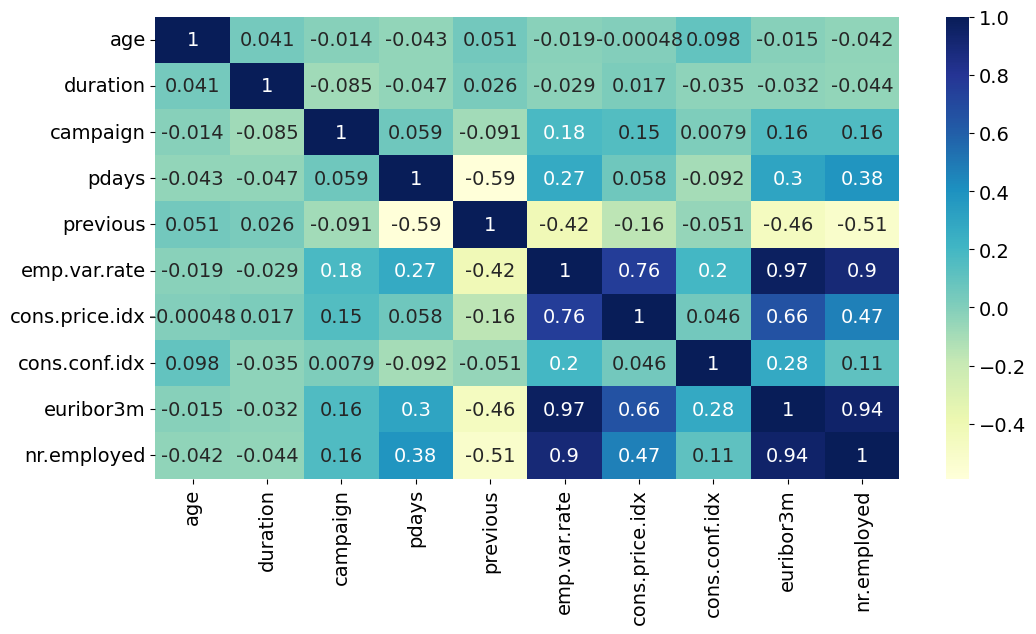

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.grid(False)
plt.show()

Note:
* euribor3m and  nr.employed is highly correlated with eachother also correlated with other variables so dropping

In [24]:
data["cons.price.idx"].value_counts()

93.994    758
93.918    667
92.893    597
93.444    528
94.465    431
93.200    386
93.075    201
92.963     75
92.201     75
92.431     43
94.199     39
92.649     36
94.027     33
94.215     30
92.379     25
92.843     25
94.055     24
94.767     24
93.369     23
93.876     23
92.713     21
94.601     20
93.749     14
92.469     14
93.798      6
92.756      1
Name: cons.price.idx, dtype: int64

In [25]:
data["cons.price.idx"].describe()

count    4119.000000
mean       93.579704
std         0.579349
min        92.201000
25%        93.075000
50%        93.749000
75%        93.994000
max        94.767000
Name: cons.price.idx, dtype: float64

In [26]:
data["cons.price.idx"].std()

0.5793488049889662

#### Finding Coefficient of variation

In [27]:
(data["cons.price.idx"].std()/data["cons.price.idx"].mean())

0.006190966399607993

* Note that the coefficent of variation is very less
* this means the data is almost a constant

In [28]:
# Default & pdays droped because of high missings, euribor3m, nr.employed dropped because of high correlations with some other variables,
# cons.price.idx is dropeed because of less CV
data.drop(['default', 'euribor3m', 'nr.employed', 'cons.price.idx', 'pdays'], axis=1, inplace=True)

#### Data after dropping the columns

In [29]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.conf.idx,y
0,30,blue-collar,married,basic.9y,yes,no,cellular,may,fri,487,2,0,nonexistent,-1.8,-46.2,no
1,39,services,single,high.school,no,no,telephone,may,fri,346,4,0,nonexistent,1.1,-36.4,no
2,25,services,married,high.school,yes,no,telephone,jun,wed,227,1,0,nonexistent,1.4,-41.8,no
3,38,services,married,basic.9y,unknown,unknown,telephone,jun,fri,17,3,0,nonexistent,1.4,-41.8,no
4,47,admin.,married,university.degree,yes,no,cellular,nov,mon,58,1,0,nonexistent,-0.1,-42.0,no


In [30]:
data.poutcome.value_counts()

nonexistent    3523
failure         454
success         142
Name: poutcome, dtype: int64

#### Seperating Numerical and Categorical predictors

In [31]:
cat_col = ['job', 'marital', 'education', 'housing', 'loan', 'month', 'day_of_week','contact', 'poutcome', 'y']
num_col = ['age',  'duration', 'emp.var.rate', 'cons.conf.idx',  'previous', 'campaign']

### Data Preparation

#### Outlier Check

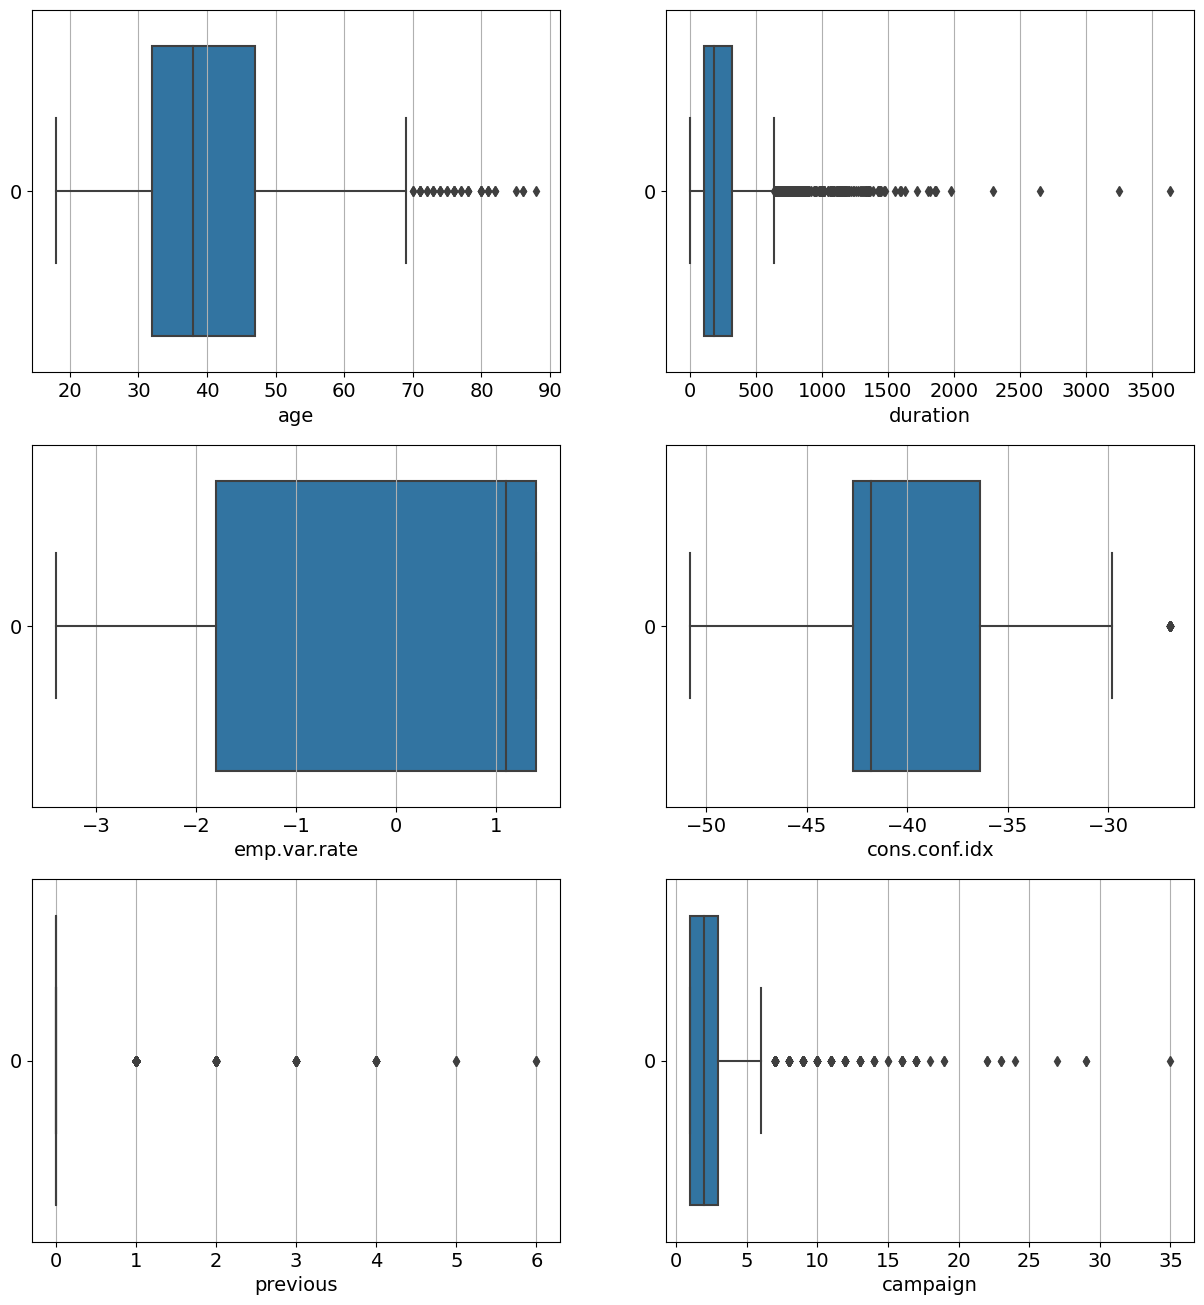

In [32]:
plt.figure(figsize=(15,16))
for i, j in  enumerate(num_col):
    plt.subplot(3,2,i+1)
    sns.boxplot(data[j],orient="h" )
    plt.xlabel(j)
plt.show()

#####  Treating Outliers IQR Method

In [33]:
def remove_outliers_iqr(df):
    # Calculate the IQR for each numeric column
    Q1 = df[num_col].quantile(0.25)
    Q3 = df[num_col].quantile(0.75)
    IQR = Q3 - Q1

    # Define a threshold for identifying outliers (e.g., 1.5 times the IQR)
    threshold = 1.5

    # Create a boolean mask for outliers
    is_outlier = ((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)

    # Filter the DataFrame to keep only rows without outliers
    df_no_outliers = df[~is_outlier]

    return df_no_outliers

# Remove outliers using the remove_outliers_iqr function


In [34]:
data_outlier_removed = remove_outliers_iqr(data)

##### Results after Outlier Treatment

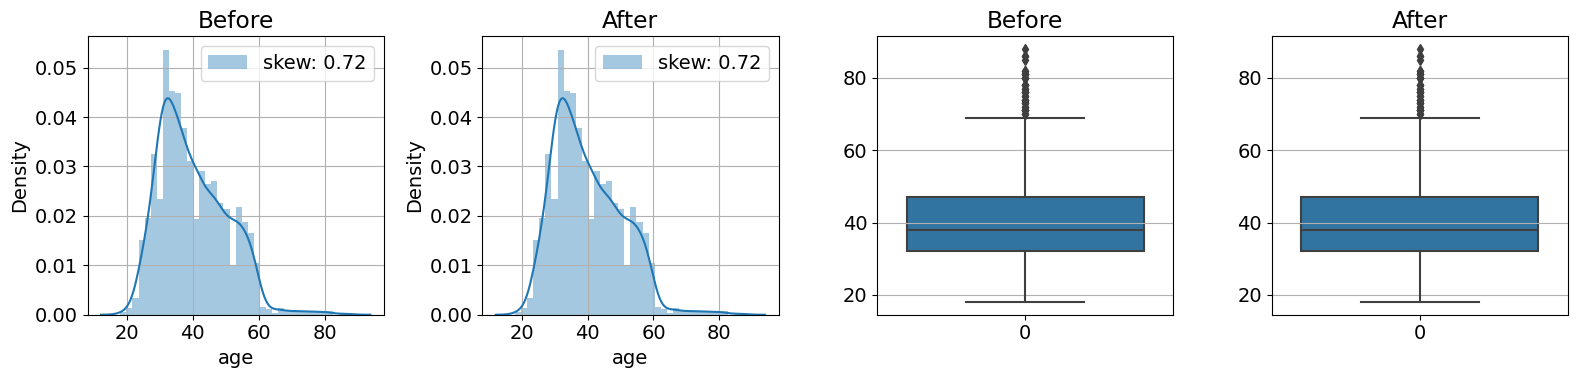

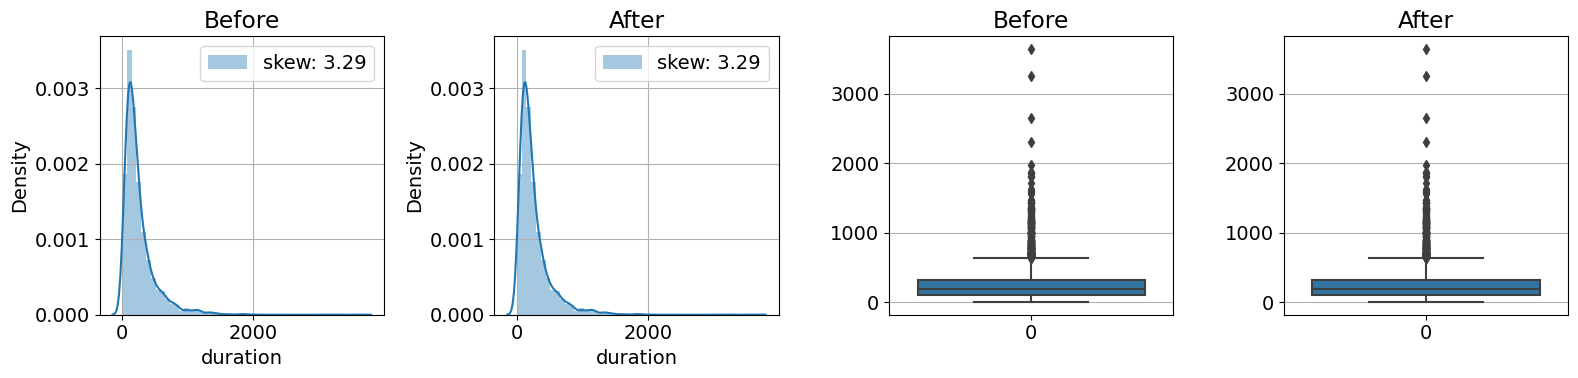

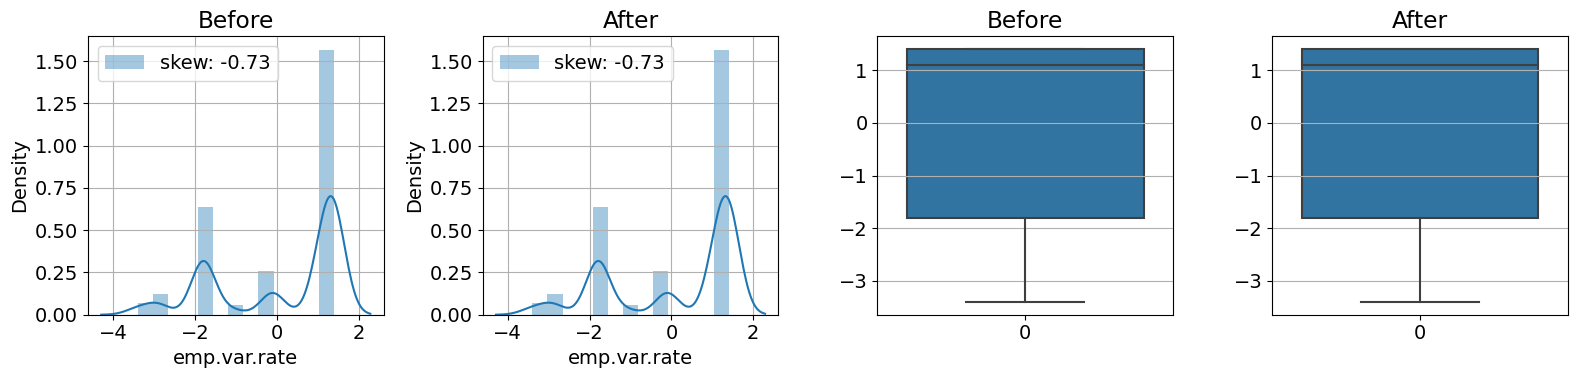

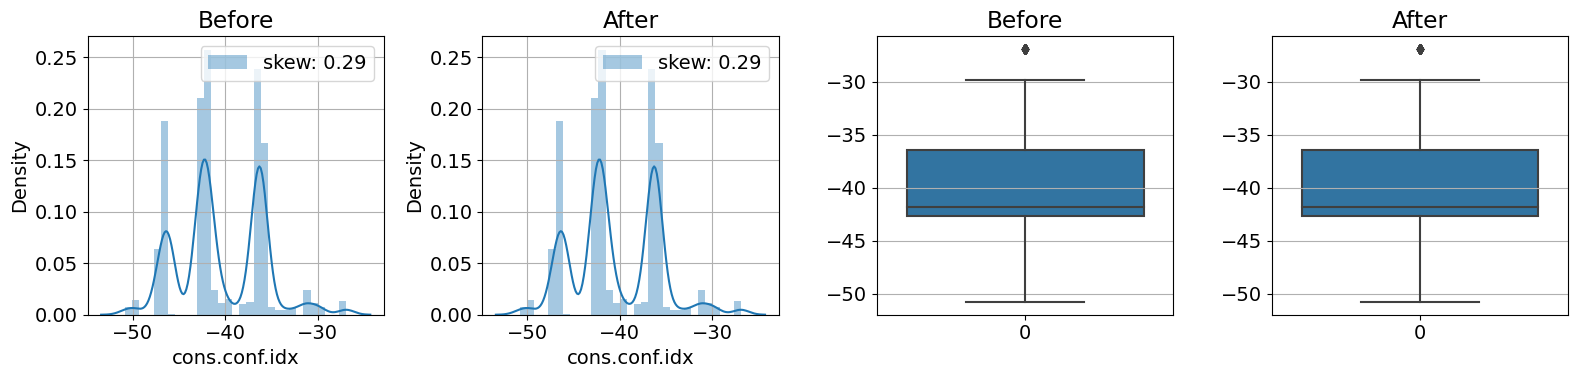

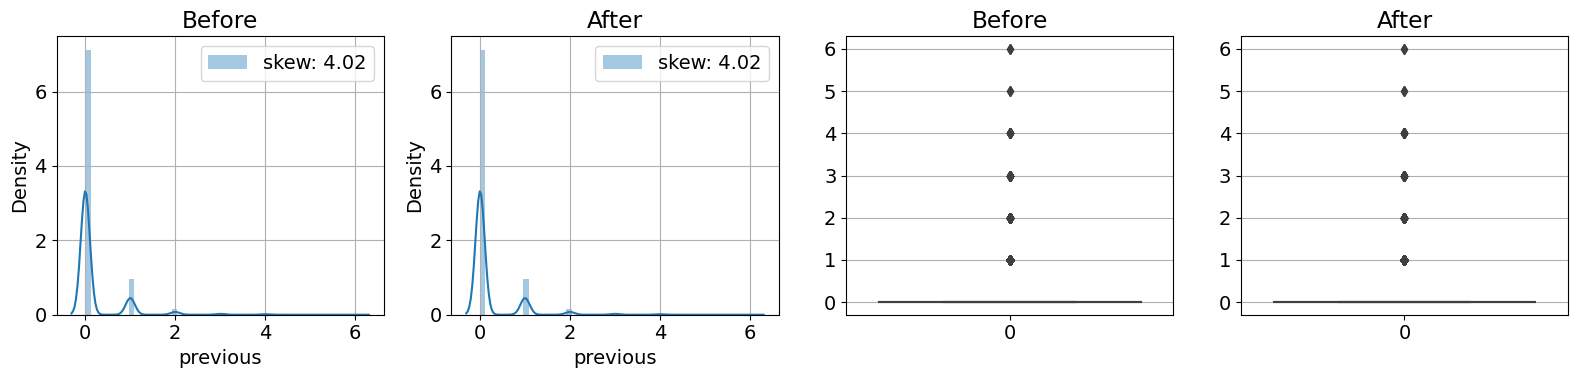

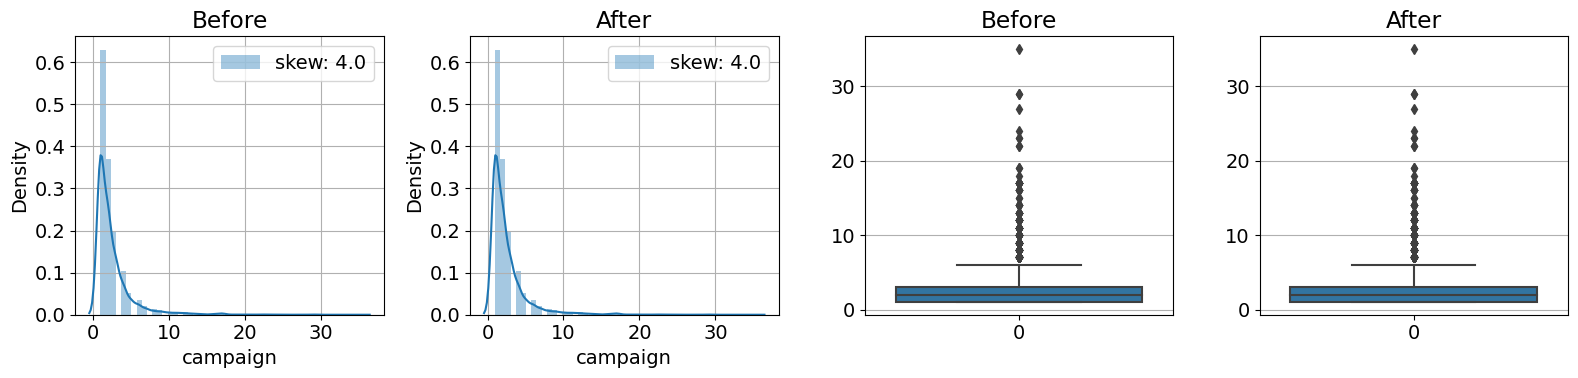

In [35]:
for col in num_col:
    plt.figure(figsize=(16,4))

    plt.subplot(141)
    sns.distplot(data[col], label="skew: " + str(np.round(data[col].skew(),2)))
    plt.title('Before')
    plt.legend()

    plt.subplot(142)
    sns.distplot(data[col], label="skew: " + str(np.round(data[col].skew(),2)))
    plt.title('After')
    plt.legend()

    plt.subplot(143)
    sns.boxplot(data[col])
    plt.title('Before')

    plt.subplot(144)
    sns.boxplot(data[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [36]:
data_outlier_removed["poutcome"].value_counts()

nonexistent    3014
Name: poutcome, dtype: int64

#### Missing Value Treatment

In [37]:
cat_var = data_outlier_removed[['job', 'marital', 'education', 'housing', 'loan', 'month', 'day_of_week','contact', 'poutcome', 'y']]
num_var = data_outlier_removed[['age',  'duration', 'emp.var.rate', 'cons.conf.idx',  'previous', 'campaign']]

In [38]:
def missing_cat(x):
    t = x.value_counts()
    x[x=='unknown'] = t.index[0]
    return x

def missing_num(x):
    x[x==999] = np.nan
    x = x.fillna(x.median())
    return x

def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99),lower=(x.quantile(0.01)))
    return x

# def iqr_treatment(df_train):
#     Q1 = df_train.quantile(0.25)
#     Q3 = df_train.quantile(0.75)
#     IQR = Q3 - Q1
#     print(IQR)
#     threshold = 1.5*IQR

#     df_num_iqr = df_train[~((df_train<(Q1 - threshold) | (df_train > (Q3 +threshold)))).any(axis=1)]
#     return df_num_iqr
#     # Q1 = x.quantile(0.25)
    # Q3 = x.quantile(0.75)
    # IQR = Q3 - Q1
    # threshold = 1.5*IQR
    # x = x.where((x >= Q1 - threshold) & (x <= Q3 + threshold))
    # return x


In [39]:
#num_var = num_var.apply(outlier_capping)
num_var = num_var.apply(missing_num)
cat_var = cat_var.apply(missing_cat)

#### Encoding Categorical Columns

In [40]:
cat_var.head()

,job,marital,education,housing,loan,month,day_of_week,contact,poutcome,y
0,blue-collar,married,basic.9y,yes,no,may,fri,cellular,nonexistent,no
1,services,single,high.school,no,no,may,fri,telephone,nonexistent,no
2,services,married,high.school,yes,no,jun,wed,telephone,nonexistent,no
3,services,married,basic.9y,yes,no,jun,fri,telephone,nonexistent,no
4,admin.,married,university.degree,yes,no,nov,mon,cellular,nonexistent,no


Observation:
Ordinal Features:
* Education
* Month
* Day of week

Nominal Features:
* Jobs
* Marital
* Housing
* Y
* poutcome

In [41]:
from sklearn.preprocessing import OrdinalEncoder

In [42]:
edc_order = ['university.degree', 'professional.course', 'high.school',"basic.9y","basic.6y","basic.4y","illiterate"]
edc_order = edc_order[::-1]
month_order = ["mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]
day_of_week_order = ["mon","tue","wed","thu","fri"]

In [43]:
def ordinal_encoding(df,column_name,order_list):
    encoder = OrdinalEncoder(categories=[order_list])
    return encoder.fit_transform(df[[column_name]])

In [44]:
cat_var["education"]=ordinal_encoding(cat_var,"education",edc_order)
cat_var["month"]=ordinal_encoding(cat_var,"month",month_order)
cat_var["day_of_week"] = ordinal_encoding(cat_var,"day_of_week",day_of_week_order)

In [45]:
cat_var.head()

,job,marital,education,housing,loan,month,day_of_week,contact,poutcome,y
0,blue-collar,married,3.0,yes,no,2.0,4.0,cellular,nonexistent,no
1,services,single,4.0,no,no,2.0,4.0,telephone,nonexistent,no
2,services,married,4.0,yes,no,3.0,2.0,telephone,nonexistent,no
3,services,married,3.0,yes,no,3.0,4.0,telephone,nonexistent,no
4,admin.,married,6.0,yes,no,8.0,0.0,cellular,nonexistent,no


In [46]:
cat_var_encoded = pd.get_dummies(cat_var, columns = cat_var.columns.difference(["education","month","day_of_week"]),  drop_first=True)

In [47]:
cat_var.columns.difference(["education","month","day_of_week"])

Index(['contact', 'housing', 'job', 'loan', 'marital', 'poutcome', 'y'], dtype='object')

In [48]:
cat_var["poutcome"].value_counts()

nonexistent    3014
Name: poutcome, dtype: int64

In [49]:
cat_var_encoded.columns

Index(['education', 'month', 'day_of_week', 'contact_telephone', 'housing_yes',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'loan_yes',
       'marital_married', 'marital_single', 'y_yes'],
      dtype='object')

In [50]:
cat_var_encoded.head()

,education,month,day_of_week,contact_telephone,housing_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,loan_yes,marital_married,marital_single,y_yes
0,3.0,2.0,4.0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,4.0,2.0,4.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,4.0,3.0,2.0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,3.0,3.0,4.0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,6.0,8.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [51]:
cat_var_encoded.columns.tolist()

['education',
 'month',
 'day_of_week',
 'contact_telephone',
 'housing_yes',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'loan_yes',
 'marital_married',
 'marital_single',
 'y_yes']

### Final Data Frame

In [52]:
data_final = pd.concat([num_var,cat_var_encoded],axis=1)

In [53]:
data_final.head()

,age,duration,emp.var.rate,cons.conf.idx,previous,campaign,education,month,day_of_week,contact_telephone,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,loan_yes,marital_married,marital_single,y_yes
0,30,487,-1.8,-46.2,0,2,3.0,2.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
1,39,346,1.1,-36.4,0,4,4.0,2.0,4.0,1,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1.4,-41.8,0,1,4.0,3.0,2.0,1,...,0,0,1,0,0,0,0,1,0,0
3,38,17,1.4,-41.8,0,3,3.0,3.0,4.0,1,...,0,0,1,0,0,0,0,1,0,0
4,47,58,-0.1,-42.0,0,1,6.0,8.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
data_final.isna().sum()

age                  0
duration             0
emp.var.rate         0
cons.conf.idx        0
previous             0
campaign             0
education            0
month                0
day_of_week          0
contact_telephone    0
housing_yes          0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
loan_yes             0
marital_married      0
marital_single       0
y_yes                0
dtype: int64

#### Renaming Columns

In [55]:
for i in data_final.columns:
    print(i.replace(".","_"))

age
duration
emp_var_rate
cons_conf_idx
previous
campaign
education
month
day_of_week
contact_telephone
housing_yes
job_blue-collar
job_entrepreneur
job_housemaid
job_management
job_retired
job_self-employed
job_services
job_student
job_technician
job_unemployed
loan_yes
marital_married
marital_single
y_yes


In [56]:
data_final.columns = [i.replace('.', '_') for i in data_final.columns]

In [57]:
data_final.columns = [i.replace('-', '_') for i in data_final.columns]

In [58]:
data_final.columns

Index(['age', 'duration', 'emp_var_rate', 'cons_conf_idx', 'previous',
       'campaign', 'education', 'month', 'day_of_week', 'contact_telephone',
       'housing_yes', 'job_blue_collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self_employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'loan_yes',
       'marital_married', 'marital_single', 'y_yes'],
      dtype='object')

1) Check if logg odds and X having relationship

* Log odds are Weight of evidence
* Total Information Value = log(Dist(1)/dist(0))[log of odds] *(dist(1) - dist(0))
* IV <0.1 - Weak relationshio
* 0.1<IV<0.3 - Strong Relationship
* 0.3 <IV<0.5 - Very strong relationship
* <0.5 - some problem with data

### Feature Engineering

In [59]:

pd.set_option("display.max_columns", 100)
data_final.head()

,age,duration,emp_var_rate,cons_conf_idx,previous,campaign,education,month,day_of_week,contact_telephone,housing_yes,job_blue_collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self_employed,job_services,job_student,job_technician,job_unemployed,loan_yes,marital_married,marital_single,y_yes
0,30,487,-1.8,-46.2,0,2,3.0,2.0,4.0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,39,346,1.1,-36.4,0,4,4.0,2.0,4.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,25,227,1.4,-41.8,0,1,4.0,3.0,2.0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,38,17,1.4,-41.8,0,3,3.0,3.0,4.0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,47,58,-0.1,-42.0,0,1,6.0,8.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [60]:
for i_var in data_final.columns.difference(['y_yes']):
    print(i_var)

age
campaign
cons_conf_idx
contact_telephone
day_of_week
duration
education
emp_var_rate
housing_yes
job_blue_collar
job_entrepreneur
job_housemaid
job_management
job_retired
job_self_employed
job_services
job_student
job_technician
job_unemployed
loan_yes
marital_married
marital_single
month
previous


In [61]:
data_final.shape

(3014, 25)

* We have 25 features

In [62]:
somerced_val = pd.DataFrame()
for i_var in data_final.columns.difference(['y_yes']):
    print(i_var)
    model = smf.logit('y_yes~'+str(i_var), data=data_final).fit()
    somerce_d = 2*metrics.roc_auc_score(data_final.y_yes, model.predict())-1
    temp = pd.DataFrame([i_var, somerce_d]).T
    somerced_val = pd.concat([somerced_val, temp], axis=0)

age
Optimization terminated successfully.
         Current function value: 0.196845
         Iterations 7
campaign
Optimization terminated successfully.
         Current function value: 0.196670
         Iterations 7
cons_conf_idx
Optimization terminated successfully.
         Current function value: 0.196342
         Iterations 7
contact_telephone
Optimization terminated successfully.
         Current function value: 0.190186
         Iterations 8
day_of_week
Optimization terminated successfully.
         Current function value: 0.196821
         Iterations 7
duration
Optimization terminated successfully.
         Current function value: 0.169764
         Iterations 8
education
Optimization terminated successfully.
         Current function value: 0.193694
         Iterations 7
emp_var_rate
Optimization terminated successfully.
         Current function value: 0.165504
         Iterations 8
housing_yes
Optimization terminated successfully.
         Current function value: 0.196849
   

LinAlgError: ignored

In [63]:
somerced_val.columns = ['feature', 'somerce_d']

In [64]:
data.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'previous', 'poutcome',
       'emp.var.rate', 'cons.conf.idx', 'y'],
      dtype='object')

In [65]:
data_final.columns

Index(['age', 'duration', 'emp_var_rate', 'cons_conf_idx', 'previous',
       'campaign', 'education', 'month', 'day_of_week', 'contact_telephone',
       'housing_yes', 'job_blue_collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self_employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'loan_yes',
       'marital_married', 'marital_single', 'y_yes'],
      dtype='object')

In [66]:
somerced_val.sort_values(by='somerce_d', ascending=False)

,feature,somerce_d
0,duration,0.584448
0,emp_var_rate,0.529726
0,contact_telephone,0.246874
0,education,0.2006
0,job_blue_collar,0.137803
0,marital_single,0.117629
0,marital_married,0.097722
0,month,0.047071
0,job_student,0.04679
0,loan_yes,0.045687


In [67]:
somerced_val.sort_values(by = 'somerce_d', inplace=True, ascending=False)

somerced_val.to_csv('somerce_d.csv')

In [68]:
somerced_feature_list = somerced_val[somerced_val.somerce_d>=0.1].feature.values.tolist()

In [69]:
somerced_feature_list

['duration',
 'emp_var_rate',
 'contact_telephone',
 'education',
 'job_blue_collar',
 'marital_single']

### Recursive Feature Elimination

In [70]:
X = data_final[data_final.columns.difference(['y_yes'])]
y = data_final[['y_yes']]

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [71]:
rfe = RFE(estimator=rf_classifier, n_features_to_select=10)
rfe = rfe.fit(X, y)

In [72]:
rfe.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False])

In [73]:
rfe_list = X.columns[rfe.get_support()].tolist()

In [74]:
rfe_list

['age',
 'campaign',
 'cons_conf_idx',
 'day_of_week',
 'duration',
 'education',
 'emp_var_rate',
 'housing_yes',
 'marital_married',
 'month']

In [75]:
len(rfe_list)

10

### Select K Best

* Starts with one variable then adds the variables based on the significance

In [76]:
SKB = SelectKBest(f_classif, k=10).fit(X, y )

In [77]:
skb_feature_list = X.columns[SKB.get_support()].tolist()

In [78]:
Final_list =list(set( rfe_list+skb_feature_list+somerced_feature_list))

In [79]:
Final_list

['job_blue_collar',
 'education',
 'emp_var_rate',
 'marital_married',
 'contact_telephone',
 'cons_conf_idx',
 'marital_single',
 'housing_yes',
 'job_student',
 'age',
 'day_of_week',
 'month',
 'job_retired',
 'duration',
 'campaign']

In [80]:
len(Final_list)

15

In [81]:
X_new = X[Final_list]
y = y

In [82]:
#X_new = X_new[X_new.columns.difference(["cons_conf_idx","age"])]

In [83]:
X_new.head()

,job_blue_collar,education,emp_var_rate,marital_married,contact_telephone,cons_conf_idx,marital_single,housing_yes,job_student,age,day_of_week,month,job_retired,duration,campaign
0,1,3.0,-1.8,1,0,-46.2,0,1,0,30,4.0,2.0,0,487,2
1,0,4.0,1.1,0,1,-36.4,1,0,0,39,4.0,2.0,0,346,4
2,0,4.0,1.4,1,1,-41.8,0,1,0,25,2.0,3.0,0,227,1
3,0,3.0,1.4,1,1,-41.8,0,1,0,38,4.0,3.0,0,17,3
4,0,6.0,-0.1,1,0,-42.0,0,1,0,47,0.0,8.0,0,58,1


In [84]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

In [85]:
vif.sort_values(by='VIF_Factor',ascending=False)

,VIF_Factor,features
5,38.257045,cons_conf_idx
9,20.740907,age
1,9.507291,education
3,6.511591,marital_married
11,5.466700,month
6,3.679318,marital_single
14,3.614639,campaign
13,3.191238,duration
10,2.928302,day_of_week
4,2.258853,contact_telephone


In [86]:
X_new = X[X[Final_list].columns.difference(["cons_conf_idx"])]
X_new.head()

,age,campaign,contact_telephone,day_of_week,duration,education,emp_var_rate,housing_yes,job_blue_collar,job_retired,job_student,marital_married,marital_single,month
0,30,2,0,4.0,487,3.0,-1.8,1,1,0,0,1,0,2.0
1,39,4,1,4.0,346,4.0,1.1,0,0,0,0,0,1,2.0
2,25,1,1,2.0,227,4.0,1.4,1,0,0,0,1,0,3.0
3,38,3,1,4.0,17,3.0,1.4,1,0,0,0,1,0,3.0
4,47,1,0,0.0,58,6.0,-0.1,1,0,0,0,1,0,8.0


In [87]:

vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns
vif.sort_values(by='VIF_Factor',ascending=False)

,VIF_Factor,features
0,13.346700,age
5,8.357129,education
11,5.881019,marital_married
13,5.370957,month
1,3.453017,campaign
4,3.090507,duration
12,3.045187,marital_single
3,2.877009,day_of_week
2,2.253633,contact_telephone
7,2.202280,housing_yes


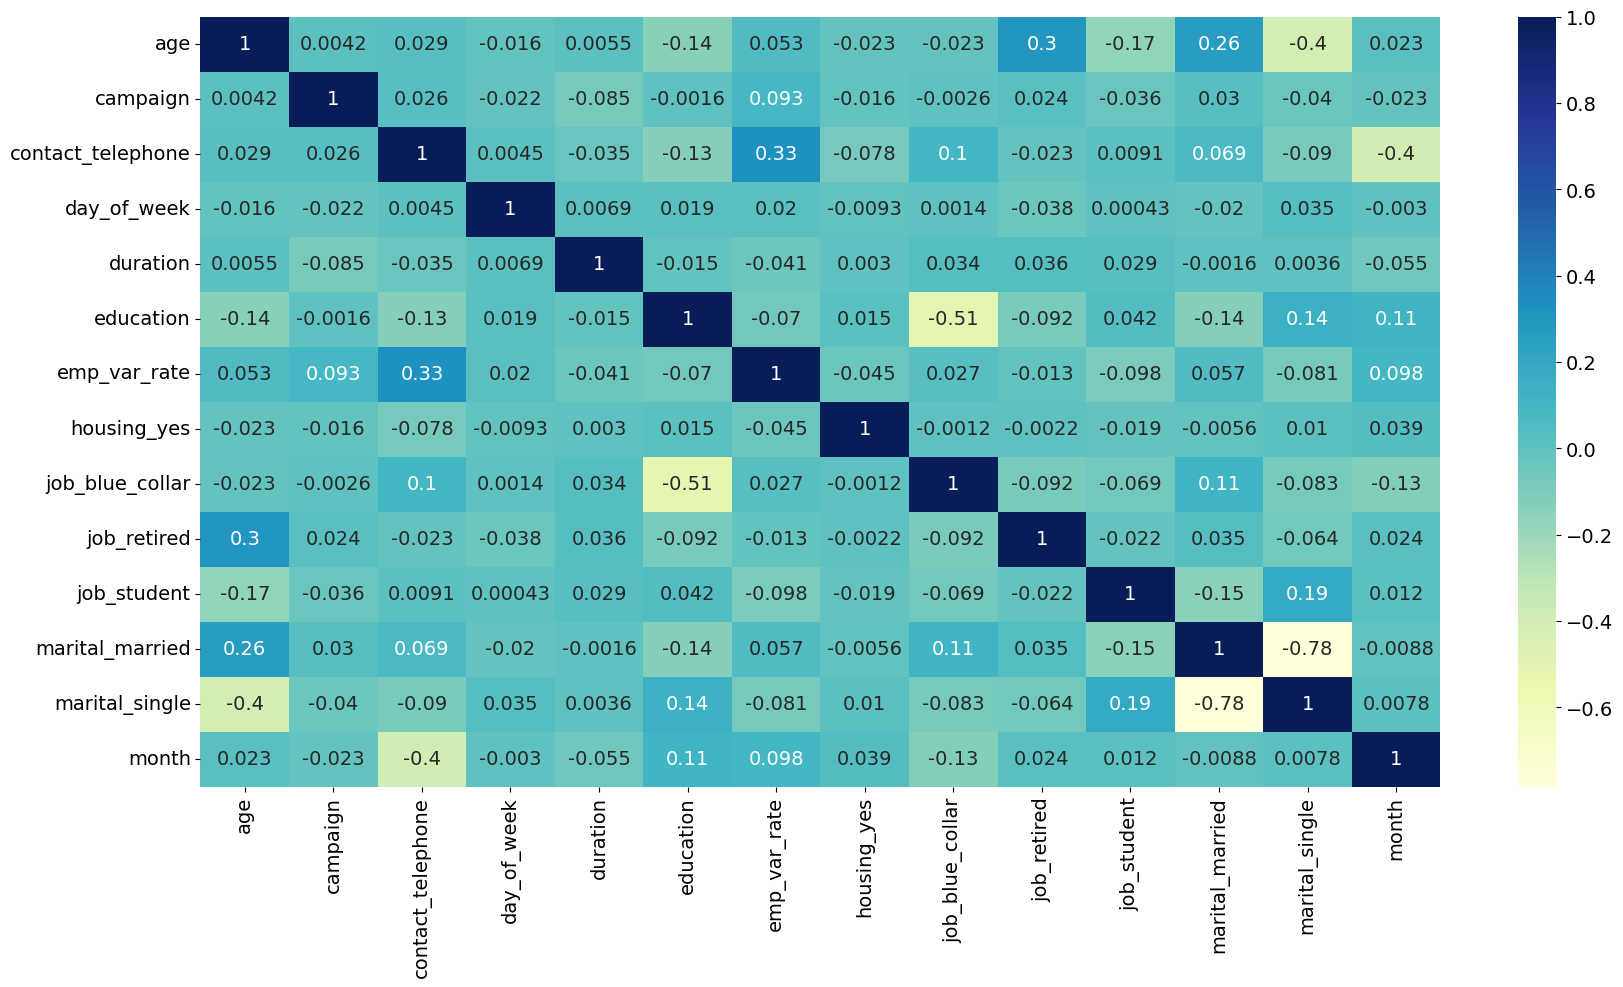

In [88]:


plt.figure(figsize=(20,10))
sns.heatmap(X_new.corr(), annot=True, cmap='YlGnBu')
plt.grid(False)
plt.show()

In [89]:
X_new = X[X[Final_list].columns.difference(["cons_conf_idx","age"])]
X_new.head()

,campaign,contact_telephone,day_of_week,duration,education,emp_var_rate,housing_yes,job_blue_collar,job_retired,job_student,marital_married,marital_single,month
0,2,0,4.0,487,3.0,-1.8,1,1,0,0,1,0,2.0
1,4,1,4.0,346,4.0,1.1,0,0,0,0,0,1,2.0
2,1,1,2.0,227,4.0,1.4,1,0,0,0,1,0,3.0
3,3,1,4.0,17,3.0,1.4,1,0,0,0,1,0,3.0
4,1,0,0.0,58,6.0,-0.1,1,0,0,0,1,0,8.0


In [90]:

vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns
vif.sort_values(by='VIF_Factor',ascending=False)

,VIF_Factor,features
4,7.505211,education
10,5.421361,marital_married
12,4.812486,month
0,3.315993,campaign
11,3.036589,marital_single
3,2.958569,duration
2,2.802664,day_of_week
6,2.173924,housing_yes
1,2.103804,contact_telephone
7,1.595980,job_blue_collar


In [111]:
final_features = vif.features.tolist()

In [112]:
data_new = pd.concat([X[final_features],y], axis=1)

In [113]:
data_new.head()

,campaign,contact_telephone,day_of_week,duration,education,emp_var_rate,housing_yes,job_blue_collar,job_retired,job_student,marital_married,marital_single,month,y_yes
0,2,0,4.0,487,3.0,-1.8,1,1,0,0,1,0,2.0,0
1,4,1,4.0,346,4.0,1.1,0,0,0,0,0,1,2.0,0
2,1,1,2.0,227,4.0,1.4,1,0,0,0,1,0,3.0,0
3,3,1,4.0,17,3.0,1.4,1,0,0,0,1,0,3.0,0
4,1,0,0.0,58,6.0,-0.1,1,0,0,0,1,0,8.0,0


In [114]:
X

,age,campaign,cons_conf_idx,contact_telephone,day_of_week,duration,education,emp_var_rate,housing_yes,job_blue_collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self_employed,job_services,job_student,job_technician,job_unemployed,loan_yes,marital_married,marital_single,month,previous
0,30,2,-46.2,0,4.0,487,3.0,-1.8,1,1,0,0,0,0,0,0,0,0,0,0,1,0,2.0,0
1,39,4,-36.4,1,4.0,346,4.0,1.1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2.0,0
2,25,1,-41.8,1,2.0,227,4.0,1.4,1,0,0,0,0,0,0,1,0,0,0,0,1,0,3.0,0
3,38,3,-41.8,1,4.0,17,3.0,1.4,1,0,0,0,0,0,0,1,0,0,0,0,1,0,3.0,0
4,47,1,-42.0,0,0.0,58,6.0,-0.1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4113,31,1,-42.0,0,3.0,463,6.0,-0.1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,8.0,0
4114,30,1,-42.7,0,3.0,53,2.0,1.4,1,0,0,0,0,0,0,0,0,0,0,1,1,0,4.0,0
4115,39,1,-42.7,1,4.0,219,4.0,1.4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,4.0,0
4117,58,1,-36.1,0,4.0,528,4.0,1.4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5.0,0


### Dealing with Data Imbalance before Modelling

In [115]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

In [116]:
X_sm, y_sm = sm.fit_resample(X[final_features].astype("float"), y)

In [117]:
y_sm.value_counts()

y_yes
0        2865
1        2865
dtype: int64

In [118]:
data_new_sm = pd.concat([X_sm,y_sm],axis=1)

In [119]:
train, test = train_test_split(data_new_sm, test_size = 0.3, random_state=123 )

### Modelling

In [120]:
train.shape

(4011, 14)

In [121]:
eqn = "y_yes~"+"+".join(final_features)

In [122]:
import statsmodels.formula.api as smf

logit_model =smf.logit(eqn, data=train).fit()
print(logit_model.summary())



Optimization terminated successfully.
         Current function value: 0.327608
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  y_yes   No. Observations:                 4011
Model:                          Logit   Df Residuals:                     3997
Method:                           MLE   Df Model:                           13
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                  0.5274
Time:                        15:14:13   Log-Likelihood:                -1314.0
converged:                       True   LL-Null:                       -2780.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.8699      0.383    -15.313      0.000      -6.621      -5.119
campaign

In [123]:
final_features.remove("month")
eqn = "y_yes~"+"+".join(final_features)

In [124]:
logit_model =smf.logit(eqn, data=train).fit()
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.327609
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  y_yes   No. Observations:                 4011
Model:                          Logit   Df Residuals:                     3998
Method:                           MLE   Df Model:                           12
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                  0.5274
Time:                        15:14:13   Log-Likelihood:                -1314.0
converged:                       True   LL-Null:                       -2780.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.8786      0.376    -15.625      0.000      -6.616      -5.141
campaign

In [125]:
final_features.remove("day_of_week")
eqn = "y_yes~"+"+".join(final_features)

In [126]:
logit_model =smf.logit(eqn, data=train).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.328376
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  y_yes   No. Observations:                 4011
Model:                          Logit   Df Residuals:                     3999
Method:                           MLE   Df Model:                           11
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                  0.5262
Time:                        15:14:14   Log-Likelihood:                -1317.1
converged:                       True   LL-Null:                       -2780.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.6793      0.367    -15.478      0.000      -6.398      -4.960
campaign

In [127]:
final_features.remove("contact_telephone")
eqn = "y_yes~"+"+".join(final_features)
logit_model =smf.logit(eqn, data=train).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.328565
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  y_yes   No. Observations:                 4011
Model:                          Logit   Df Residuals:                     4000
Method:                           MLE   Df Model:                           10
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                  0.5260
Time:                        15:14:14   Log-Likelihood:                -1317.9
converged:                       True   LL-Null:                       -2780.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -5.7597      0.361    -15.945      0.000      -6.468      -5.052
campaign      

In [128]:
final_features.remove("job_blue_collar")
eqn = "y_yes~"+"+".join(final_features)
logit_model =smf.logit(eqn, data=train).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.328814
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  y_yes   No. Observations:                 4011
Model:                          Logit   Df Residuals:                     4001
Method:                           MLE   Df Model:                            9
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                  0.5256
Time:                        15:14:14   Log-Likelihood:                -1318.9
converged:                       True   LL-Null:                       -2780.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -5.9483      0.337    -17.643      0.000      -6.609      -5.288
campaign      

In [129]:
final_features.remove("campaign")
eqn = "y_yes~"+"+".join(final_features)
logit_model =smf.logit(eqn, data=train).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.328817
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  y_yes   No. Observations:                 4011
Model:                          Logit   Df Residuals:                     4002
Method:                           MLE   Df Model:                            8
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                  0.5256
Time:                        15:14:14   Log-Likelihood:                -1318.9
converged:                       True   LL-Null:                       -2780.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -5.9628      0.324    -18.382      0.000      -6.599      -5.327
duration      

In [130]:
final_features.remove("housing_yes")
eqn = "y_yes~"+"+".join(final_features)
logit_model =smf.logit(eqn, data=train).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.329196
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  y_yes   No. Observations:                 4011
Model:                          Logit   Df Residuals:                     4003
Method:                           MLE   Df Model:                            7
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                  0.5251
Time:                        15:14:14   Log-Likelihood:                -1320.4
converged:                       True   LL-Null:                       -2780.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -6.0472      0.321    -18.829      0.000      -6.677      -5.418
duration      

In [131]:
final_features.remove("marital_married")
eqn = "y_yes~"+"+".join(final_features)
logit_model =smf.logit(eqn, data=train).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.329444
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  y_yes   No. Observations:                 4011
Model:                          Logit   Df Residuals:                     4004
Method:                           MLE   Df Model:                            6
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                  0.5247
Time:                        15:14:14   Log-Likelihood:                -1321.4
converged:                       True   LL-Null:                       -2780.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.7720      0.251    -22.999      0.000      -6.264      -5.280
duration         

In [132]:
# final_features.remove("job_student")
# eqn = "y_yes~"+"+".join(final_features)
# logit_model =smf.logit(eqn, data=train).fit()
# print(logit_model.summary())

## Final Predicted Equation

### LE = -5.7746 +(0.0113)*duration + (0.3587)(education)-1.1390(emp_var_rate)+1.3971(job_retired)+ 0.6417(marital_single)+ 0.9837(job_student)

Probality(Y_YES=1) = exp(LE)/(1+exp(LE))

### Evaluation

In [133]:
train['pred_prob'] =logit_model.predict(train)
test['pred_prob'] =logit_model.predict(test)

In [134]:
print( f"Train ROC AUC: {metrics.roc_auc_score(train.y_yes, train.pred_prob)}")
print( f"Test ROC AUC: {metrics.roc_auc_score(test.y_yes, test.pred_prob)}")

Train ROC AUC: 0.9294416125017219
Test ROC AUC: 0.9195535574074977


In [135]:
train_Gini = 2*metrics.roc_auc_score(train.y_yes, train.pred_prob)-1
print('Train_Gini', train_Gini)

test_Gini = 2*metrics.roc_auc_score(test.y_yes, test.pred_prob)-1
print('Test_Gini', test_Gini)

Train_Gini 0.8588832250034437
Test_Gini 0.8391071148149953


### Getting Cutoff

Note: Which cutoff gives highest specificity and sensitivity is the good cuttoff

For every cuttoff I am finding sensitivy and specificity

In [ ]:
roc_df = pd.DataFrame()
for cut_off in np.linspace(0,1):
    #roc_df_temp['cut_off'] = cut_off
    train['y_pred'] = np.where(train.pred_prob>cut_off, 1, 0)
    train['TP'] = np.where(((train.y_yes ==1) & (train.y_pred==1)), 1, 0)
    train['TN'] = np.where(((train.y_yes ==0) & (train.y_pred==0)), 1, 0)
    train['FP'] = np.where(((train.y_yes ==0) & (train.y_pred==1)), 1, 0)
    train['FN'] = np.where(((train.y_yes ==1) & (train.y_pred==0)), 1, 0)
    sensitivity = train.TP.sum()/train.y_yes.sum()
    specificity = train.TN.sum()/(1-train.y_yes).sum()
    accuracy = (train.TN.sum()+train.TP.sum())/train.y_yes.count()
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_df = pd.concat([roc_df, roc_like_table], axis=0)

In [137]:
roc_df['total'] = roc_df.sensitivity + roc_df.specificity


In [138]:
roc_df.sort_values( by="total", ascending=False)

,cutoff,sensitivity,specificity,accuracy,total
0,0.387755,0.945445,0.804769,0.874844,1.750214
0,0.489796,0.908909,0.840537,0.874595,1.749445
0,0.448980,0.924424,0.824640,0.874346,1.749064
0,0.469388,0.916917,0.832091,0.874346,1.749008
0,0.367347,0.952452,0.794834,0.873348,1.747286
0,0.510204,0.900901,0.844511,0.872600,1.745412
0,0.346939,0.958959,0.785892,0.872102,1.744851
0,0.408163,0.935936,0.808743,0.872102,1.744679
0,0.428571,0.929930,0.814704,0.872102,1.744634
0,0.530612,0.894895,0.848982,0.871852,1.743877


In [139]:
roc_df[roc_df.total == roc_df.total.max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.387755,0.945445,0.804769,0.874844,1.750214


In [140]:
train['y_pred'] = np.where(train.pred_prob>0.040816, 1, 0)
test['y_pred'] = np.where(test.pred_prob>.040816, 1, 0)

### Classification Report

In [141]:
print(metrics.classification_report(train.y_yes, train.y_pred))

              precision    recall  f1-score   support

           0       1.00      0.44      0.61      2013
           1       0.64      1.00      0.78      1998

    accuracy                           0.72      4011
   macro avg       0.82      0.72      0.70      4011
weighted avg       0.82      0.72      0.70      4011



# Machine Learning

In [148]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
y.value_counts()
X_sm, Y_sm = sm.fit_resample(X[Final_list].astype("float"),y)
Y_sm.value_counts()
train_X, test_X,train_y, test_y = train_test_split(X_sm, Y_sm, test_size = 0.3, random_state=123 )

In [149]:
train_X.shape

(4011, 15)

In [144]:
#Decision Tree Classifier
dt_model = RandomForestClassifier(max_depth=10, max_leaf_nodes=10)
dt_model.fit(train_X, train_y)

RandomForestClassifier(max_depth=10, max_leaf_nodes=10)

In [145]:
2*metrics.roc_auc_score(train_y, pd.DataFrame(dt_model.predict_proba(train_X))[1])-1

0.8983534832396014

In [146]:
2*metrics.roc_auc_score(test_y, pd.DataFrame(dt_model.predict_proba(test_X))[1])-1

0.8634914207622617

In [147]:
param_grid = {'max_depth': [5,6,7,8,9,10], 'n_estimators':[50,100,200], 'max_features':[4,5,6,7,8]}
RF_GCV_model = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, scoring='f1_weighted')
RF_GCV_model = RF_GCV_model.fit(train_X, train_y)

KeyboardInterrupt: ignored

In [ ]:
RF_GCV_model.best_params_

In [ ]:
RF_model = RandomForestClassifier(n_estimators=200, max_depth=9, max_features=7).fit(train_X, train_y)

In [ ]:
metrics.roc_auc_score(train_y, pd.DataFrame(RF_model.predict_proba(train_X))[1])

In [ ]:
metrics.roc_auc_score(test_y, pd.DataFrame(RF_model.predict_proba(test_X))[1])

In [ ]:
#XGBOOST
xgb_estimator = XGBClassifier( learning_rate=0.01,
                               n_estimators=100,
                               max_depth=5,
                               gamma=1,
                               subsample=0.8,
                               colsample_bytree=0.8,
                               n_jobs=-1,
                               reg_alpa=1,
                               scale_pos_weight=1,
                               random_state=42,
                               verbose=1).fit(train_X, train_y)

In [ ]:
print('train_auc', metrics.roc_auc_score(train_y,pd.DataFrame(xgb_estimator.predict_proba(train_X))[1]))

print('test_auc', metrics.roc_auc_score(test_y,pd.DataFrame(xgb_estimator.predict_proba(test_X))[1]))

In [ ]:
print(metrics.classification_report(train_y, xgb_estimator.predict(train_X)))

print(metrics.classification_report(test_y, xgb_estimator.predict(test_X)))

Decision Trees

In [ ]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid = {'max_depth': np.arange(2, 5),
             'max_features': np.arange(4,7)}
data_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 3)
data_tree.fit(train_x,train_y)

In [ ]:
tree_train_pred= data_tree.predict(train_x)
tree_test_pred=data_tree.predict(test_x)

Baseline Modelling

In [150]:
def execute_model(estimator, features, features_set):

    train_features = train_X[features]
    train_labels = train_y

    print('Training Features Shape:', train_features.shape)
    print('Training Labels Shape:', train_labels.shape)

    # Fit(train) the model on training data
    model = estimator.fit(train_features, train_labels)

    return print_metrics(model, features, features_set)

In [151]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix

def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, y_test, y_scores,t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """

    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'],
                       index=['neg', 'pos']))

    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');

    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(6,3))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

def find_cutoff(y_test,y_scores):
    #p, r, thresholds = precision_recall_curve(y_test, y_scores)
    #precision_recall_threshold(p, r, thresholds, y_test, y_scores, 0.20)
    #plot_precision_recall_vs_threshold(p, r, thresholds)

    fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
    plot_roc_curve(fpr, tpr, 'recall_optimized')
    return auc(fpr, tpr) # AUC of ROC

In [152]:
def print_metrics(model, features, features_set):

    model_string = str(model).split('(')[0]
    print("Model: ",str(model_string))
    df = pd.DataFrame(columns=metrics_df.columns)

    for typ in ["Train","Test"]:
        print("************************** {} **************************".format(typ))

        if typ == 'Train':
            y = train_y
            if model == 'BASELINE':
                pred = pd.Series(index=y.index.copy())
                pred.fillna(y.mode()[0],inplace=True)
                auc = (metrics.roc_auc_score(y, pred)*100).round(2)
            else:
                pred = model.predict(train_X[features])
                prob = model.predict_proba(train_X[features])[:,1]
                auc = (find_cutoff(y,prob)*100).round(2)
            acc = (metrics.accuracy_score(y, pred)*100).round(2)
            print("Train Accuracy : {} %.".format(acc))
        else:
            y = test_y
            if model == 'BASELINE':
                pred = pd.Series(index=y.index.copy())
                pred.fillna(y.mode()[0],inplace=True)
                auc = (metrics.roc_auc_score(y, pred)*100).round(2)
            else:
                pred = model.predict(test_X[features])
                prob = model.predict_proba(test_X[features])[:,1]
                auc = (find_cutoff(y,prob)*100).round(2)

        #auc = (metrics.roc_auc_score(y, pred)*100).round(2)
        print("AUC : {} %.".format(auc))

        df.loc[-1] = [model,model_string,"AUC",typ,auc,features_set]
        df.index = df.index + 1

    return df

In [154]:
def find_best_features(model, ftr_names='', count=50,verbose=False):
    if ftr_names == '':
        ftr_names = list(all_features) + ['IT']

    # Print the results
    feature_rank = pd.DataFrame([ftr_names,list(model.feature_importances_)]).T.sort_values(by=[1],ascending=False).reset_index(drop=True)
    feature_rank.columns = ["Predictor","Importance"]
    feature_rank = feature_rank.iloc[0:-1,:]
    if verbose:
        print("Features sorted by their score:")
        print(feature_rank.head(count))
    sns.barplot( y = 'Predictor', x = 'Importance', data = feature_rank.head(20) )
    plt.show()
    return feature_rank['Predictor'].head(count)

In [155]:
metrics_df = pd.DataFrame(columns=["Model","Model_Name","Metric","Train_Test","Value","Features_used"])

Training Features Shape: (4011, 15)
Training Labels Shape: (4011, 1)
Model:  LogisticRegression
************************** Train **************************
Train Accuracy : 86.54 %.
AUC : 92.5 %.
************************** Test **************************
AUC : 91.89 %.


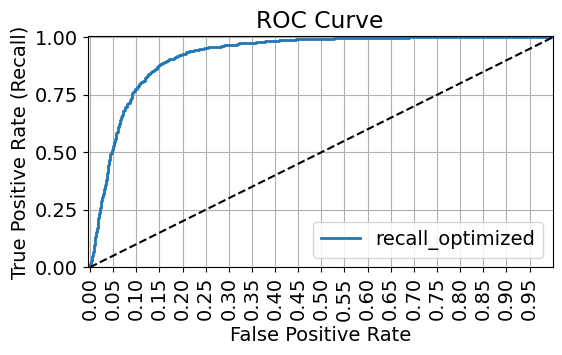

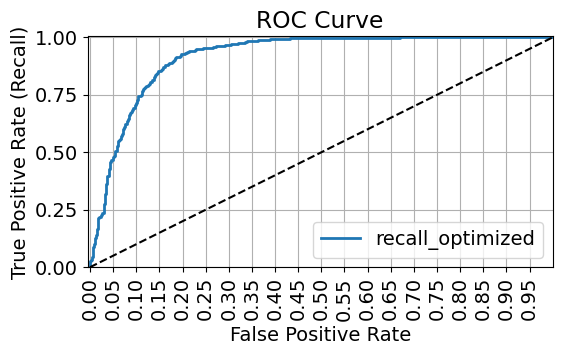

In [156]:
all_features = train_X.columns

#All Columns
metrics_df = metrics_df.append(execute_model(LogisticRegression(), all_features, 'ALL'))



In [157]:
n_trees=500
xgb_estimator = XGBClassifier(n_estimators=n_trees,
                         random_state = 42,
                        n_jobs=-1,
                        verbose=1)

Training Features Shape: (4011, 15)
Training Labels Shape: (4011, 1)
[15:18:02] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

Model:  XGBClassifier
************************** Train **************************
Train Accuracy : 100.0 %.
AUC : 100.0 %.
************************** Test **************************
AUC : 99.74 %.


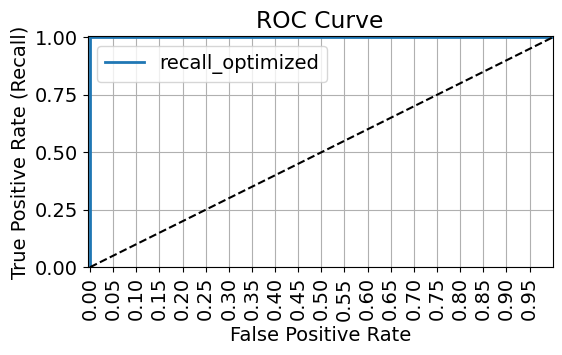

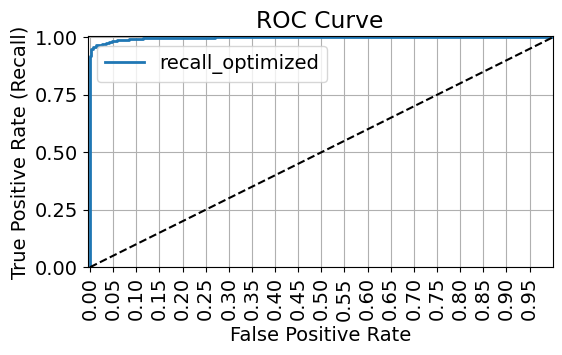

In [158]:
metrics_df = metrics_df.append(execute_model(xgb_estimator, all_features, 'ALL'))


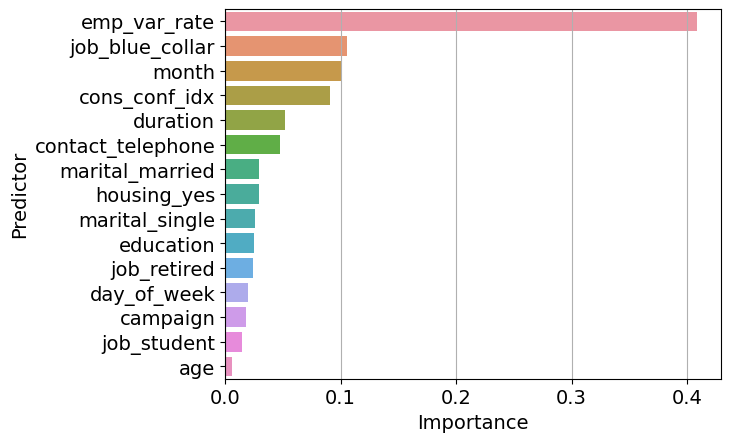

XGBoost Best features are:
 0          emp_var_rate
1       job_blue_collar
2                 month
3         cons_conf_idx
4              duration
5     contact_telephone
6       marital_married
7           housing_yes
8        marital_single
9             education
10          job_retired
11          day_of_week
12             campaign
13          job_student
14                  age
Name: Predictor, dtype: object


In [159]:
xgb_features = find_best_features(xgb_estimator, '', count=20,verbose=False)
print("XGBoost Best features are:\n",xgb_features)

Training Features Shape: (4011, 15)
Training Labels Shape: (4011, 1)
Model:  KNeighborsClassifier
************************** Train **************************
Train Accuracy : 92.55 %.
AUC : 99.28 %.
************************** Test **************************
AUC : 96.19 %.


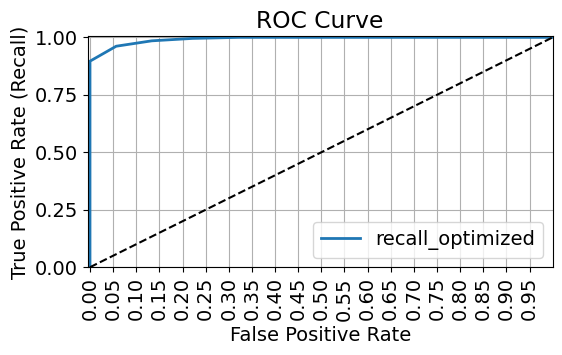

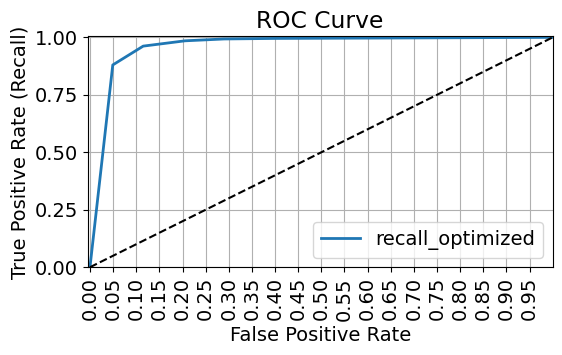

In [167]:
metrics_df = metrics_df.append(execute_model(KNeighborsClassifier(), all_features, 'ALL'))

### Modelling with Selected Features

Training Features Shape: (4011, 15)
Training Labels Shape: (4011, 1)
[15:21:31] WARNING: ../src/learner.cc:767: 
Parameters: { "reg_alpa", "verbose" } are not used.

Model:  XGBClassifier
************************** Train **************************
Train Accuracy : 96.56 %.
AUC : 99.57 %.
************************** Test **************************
AUC : 99.26 %.


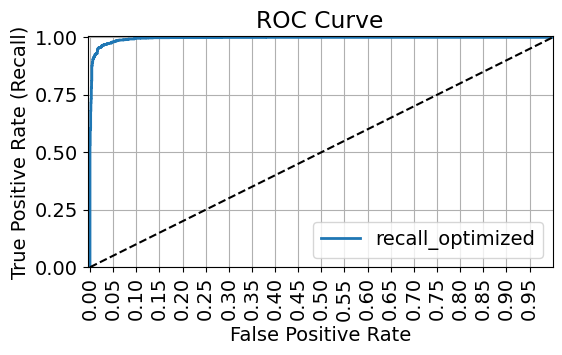

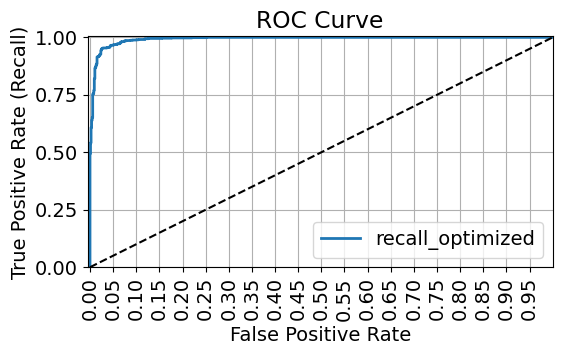

In [171]:
metrics_df_featureE = metrics_df.append(execute_model(xgb_estimator, Final_list, 'ALL'))

In [172]:
rf = RandomForestClassifier()

Training Features Shape: (4011, 15)
Training Labels Shape: (4011, 1)
Model:  RandomForestClassifier
************************** Train **************************
Train Accuracy : 100.0 %.
AUC : 100.0 %.
************************** Test **************************
AUC : 99.79 %.


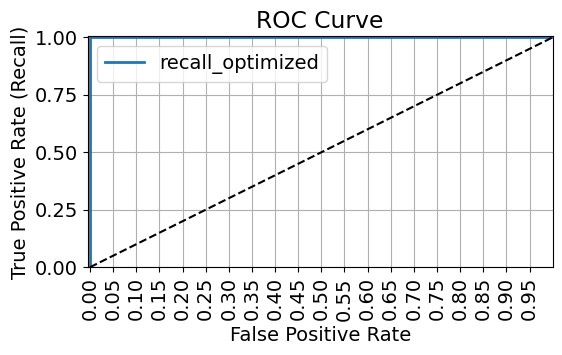

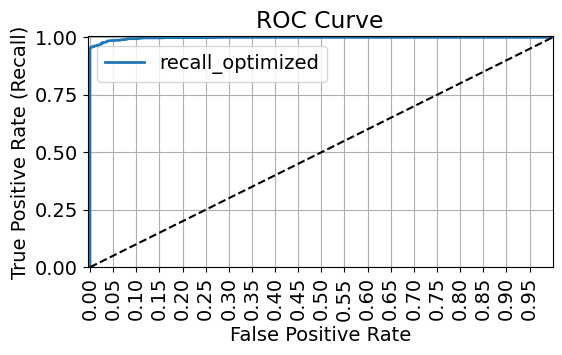

In [173]:
metrics_df_featureE = metrics_df.append(execute_model(rf, Final_list, 'ALL'))


Training Features Shape: (4011, 15)
Training Labels Shape: (4011, 1)
Model:  KNeighborsClassifier
************************** Train **************************
Train Accuracy : 92.55 %.
AUC : 99.28 %.
************************** Test **************************
AUC : 96.19 %.


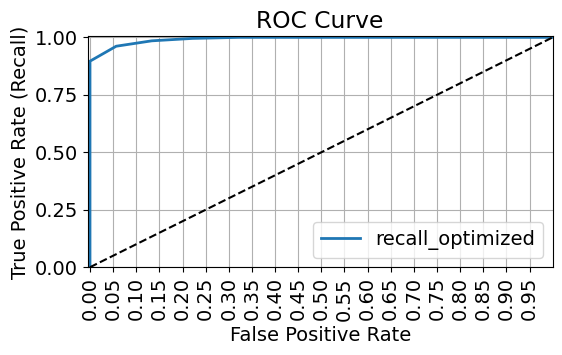

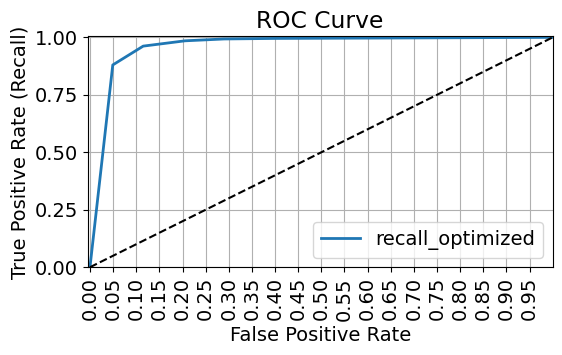

In [174]:
metrics_df_featureE = metrics_df.append(execute_model(KNN_Classifier, Final_list, 'ALL'))

In [168]:
#XGBOOST
xgb_estimator = XGBClassifier( learning_rate=0.01,
                               n_estimators=100,
                               max_depth=5,
                               gamma=1,
                               subsample=0.8,
                               colsample_bytree=0.8,
                               n_jobs=-1,
                               reg_alpa=1,
                               scale_pos_weight=1,
                               random_state=42,
                               verbose=1).fit(train_X, train_y)

[15:21:24] WARNING: ../src/learner.cc:767: 
Parameters: { "reg_alpa", "verbose" } are not used.



In [169]:
print('train_auc', metrics.roc_auc_score(train_y,pd.DataFrame(xgb_estimator.predict_proba(train_X))[1]))

print('test_auc', metrics.roc_auc_score(test_y,pd.DataFrame(xgb_estimator.predict_proba(test_X))[1]))

train_auc 0.995727968405564
test_auc 0.992580047760612


In [170]:
print(metrics.classification_report(train_y, xgb_estimator.predict(train_X)))

print(metrics.classification_report(test_y, xgb_estimator.predict(test_X)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2013
           1       0.95      0.98      0.97      1998

    accuracy                           0.97      4011
   macro avg       0.97      0.97      0.97      4011
weighted avg       0.97      0.97      0.97      4011

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       852
           1       0.94      0.98      0.96       867

    accuracy                           0.96      1719
   macro avg       0.96      0.96      0.96      1719
weighted avg       0.96      0.96      0.96      1719



# Conclusion

In [175]:
top_100_cust_to_target = test.sort_values(by= 'pred_prob',ascending=False).head(100)

### Based on the predicted score with the model we can pickup which customer can target

In [176]:
top_100_cust_to_target

,campaign,contact_telephone,day_of_week,duration,education,emp_var_rate,housing_yes,job_blue_collar,job_retired,job_student,marital_married,marital_single,month,y_yes,pred_prob,y_pred
4616,1.979078,0.020922,2.020922,617.020922,6.000000,-2.810037,0.979078,0.000000,0.000000,0.020922,0.000000,1.000000,3.000000,1,0.999217,1
3721,2.000000,0.108251,2.216502,617.216502,5.783498,-2.466996,0.891749,0.000000,0.000000,0.000000,0.000000,1.000000,2.891749,1,0.998729,1
4994,1.000000,0.011738,0.988262,600.082166,5.964786,-2.853048,0.000000,0.011738,0.000000,0.000000,1.000000,0.000000,4.964786,1,0.998265,1
4808,1.025633,0.987184,3.948735,633.948735,5.974367,-1.758988,0.987184,0.000000,0.000000,0.000000,0.000000,0.987184,1.038449,1,0.997806,1
5330,1.665140,0.334860,2.334860,617.334860,6.000000,-1.460103,0.665140,0.000000,0.000000,0.334860,0.000000,1.000000,3.000000,1,0.997503,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5275,1.129606,0.129606,0.518422,565.648028,5.351972,-1.385262,1.000000,0.129606,0.000000,0.000000,1.000000,0.000000,2.129606,1,0.983627,1
4212,2.212838,0.000000,3.148647,306.510132,4.425676,-2.900000,0.787162,0.000000,0.787162,0.212838,0.787162,0.212838,3.787162,1,0.983471,1
5340,1.375960,0.000000,1.375960,386.631723,6.000000,-2.937596,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.255762,1,0.982919,1
5668,2.000000,0.000000,2.000000,427.300470,6.000000,-1.948263,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.019718,1,0.982295,1


# Model Evaluation By Decile Anlaysis

# Rank Ordering
1) Divide the data into 10 deciles wrt probablities<br>
2) A part with high probablity should have higher number of ones.<br>
3) A part with lower probablity should have lower number of ones.<br>

Note:

* If this pattern appears then the model is fine

In [177]:
test.head()

,campaign,contact_telephone,day_of_week,duration,education,emp_var_rate,housing_yes,job_blue_collar,job_retired,job_student,marital_married,marital_single,month,y_yes,pred_prob,y_pred
3575,1.000000,0.000000,0.568219,380.977532,5.568219,-2.425041,0.568219,0.0,0.0,0.0,1.0,0.0,2.568219,1,0.962931,1
3965,2.919811,0.000000,3.959906,291.719339,4.040094,-1.800000,0.000000,0.0,0.0,0.0,1.0,0.0,1.959906,1,0.730570,1
2411,3.000000,0.000000,1.000000,160.000000,4.000000,1.400000,1.000000,0.0,0.0,0.0,1.0,0.0,5.000000,0,0.016254,0
1119,1.000000,1.000000,0.000000,349.000000,6.000000,1.100000,0.000000,0.0,0.0,0.0,1.0,0.0,2.000000,0,0.286375,1
3278,1.000000,0.343115,0.343115,481.401802,5.000000,0.885328,1.000000,0.0,0.0,0.0,1.0,0.0,6.029344,1,0.614050,1


In [178]:
train.head()

,campaign,contact_telephone,day_of_week,duration,education,emp_var_rate,housing_yes,job_blue_collar,job_retired,job_student,marital_married,marital_single,month,y_yes,pred_prob,y_pred,TP,TN,FP,FN
3639,2.165175,0.0,3.165175,416.321401,5.66965,-1.700000,0.0,0.0,0.0,0.0,0.0,1.0,4.000000,1,0.970523,1,0,0,0,1
4189,3.610348,0.0,3.000000,267.042239,6.00000,-2.182154,1.0,0.0,0.0,0.0,1.0,0.0,1.694826,1,0.864422,1,0,0,0,1
2724,3.000000,1.0,0.000000,405.000000,6.00000,1.100000,0.0,0.0,0.0,0.0,1.0,0.0,2.000000,0,0.430289,1,0,1,0,0
2850,3.000000,0.0,0.000000,326.000000,6.00000,-2.900000,1.0,0.0,0.0,0.0,0.0,1.0,4.000000,0,0.980968,1,0,1,0,0
1780,1.000000,1.0,2.000000,71.000000,3.00000,1.400000,1.0,1.0,0.0,0.0,1.0,0.0,3.000000,0,0.004205,0,0,1,0,0


In [179]:
train["decile"]= pd.qcut(train.pred_prob,10,labels=False)
test["decile"]= pd.qcut(test.pred_prob,10,labels=False)

In [180]:
train["y_no"] = 1-train.y_yes
test["y_no"] = 1-test.y_yes

In [186]:
train_deciles = train.groupby("decile").agg(min_prob=("pred_prob","min"),
                            max_prob=("pred_prob","max"),
                            Num_Yes= ("y_yes","sum"),
                            Num_No= ("y_no","sum"),
                            Total =("y_yes","count"))



In [192]:
train_deciles

,min_prob,max_prob,Num_Yes,Num_No,Total
decile,,,,,
0,0.001143,0.012401,0,402,402
1,0.012418,0.032030,2,399,401
2,0.032074,0.093913,21,380,401
3,0.094118,0.305966,45,356,401
4,0.306070,0.586261,190,211,401
5,0.586490,0.744183,305,96,401
6,0.744849,0.834438,343,58,401
7,0.834539,0.918128,357,44,401
8,0.918141,0.968427,364,37,401


In [190]:
train_deciles.to_csv("train_deciles.csv")

In [191]:
test_deciles = test.groupby("decile").agg(min_prob=("pred_prob","min"),
                            max_prob=("pred_prob","max"),
                            Num_Yes= ("y_yes","sum"),
                            Num_No= ("y_no","sum"),
                            Total =("y_yes","count"))

test_deciles.to_csv("test_deciles.csv")

In [193]:
test_deciles

,min_prob,max_prob,Num_Yes,Num_No,Total
decile,,,,,
0,0.001385,0.013096,0,172,172
1,0.013228,0.034486,2,170,172
2,0.034567,0.099314,8,164,172
3,0.099459,0.352474,25,147,172
4,0.357000,0.609062,94,78,172
5,0.609067,0.746274,130,41,171
6,0.746542,0.836119,145,27,172
7,0.836744,0.916522,152,20,172
8,0.916845,0.966297,158,14,172


Calculation BadRate

1) BadRate = Num_Yes/ Num_Nos - Gives you how much people are going to respond targeting that quantile of people<br>
2) Dist Good =out of 307 responses, how many people are going to respond can be found  = No_Yes/307(Total REsponse)<br>
3)  Dist Bad = No_No/ total responses <br>
4) R- With Cum Good Distributions you can find how many people you can respond<br>
5) N - With Cum Bad Distributions you can find how many people wont respond<br>





R - N  will give us the KS value

KS = Max |CDF_pos - CDF_neg|

This KS value is the perfect cutoff that separates the 1s and Os

KS (Kolmogorov-Smirnov)

Note:

Bad Rate should be in decreasing order with decreasing probablity<br>
KS should be almost similar between train and test<br>
%1 should be similar between train and test<br>
KS value should come in top-5 deciles<br>

### Lift
The amount of respone you can get by choosing random saples

Lift = cum%dist / 10*(number of decile)